In [ ]:
#Importing all the Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd

# Load the dataset with proper separator and header
train_data = pd.read_csv('train.csv', sep=';', header=0)
test_data = pd.read_csv('test.csv', sep=';', header=0)

# Display the first few rows of the training dataset
print(train_data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Display the first few rows of the training dataset
print(train_data.head())

# Check for missing values
print(train_data.isnull().sum())

# Check data types
print(train_data.dtypes)

# Summary statistics
print(train_data.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Before Encoding")
print(train_data.head())

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col]) #replacing the original column with labelled column in the training dataset
    test_data[col] = label_encoder.transform(test_data[col]) #replacing the original column with labelled column in the testing dataset

# Encode target variable 'y'
train_data['y'] = label_encoder.fit_transform(train_data['y'])
test_data['y'] = label_encoder.transform(test_data['y'])

print("After Encoding")
print(train_data.head())

Before Encoding
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
After Encoding
   age  job  marital  education  default  balance  housing  loan  contact  \
0  

In [ ]:
# Separate features and target variable
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train_scaled)

[[ 1.60696496 -0.10381968 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 [ 0.28852927  1.42400783  1.3683719  ... -0.41145311 -0.25194037
   0.44489814]
 [-0.74738448 -0.71495069 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 ...
 [ 2.92540065  0.20174582 -0.27576178 ...  1.43618859  1.05047333
  -0.56617504]
 [ 1.51279098 -1.02051619 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 [-0.37068857 -0.71495069 -0.27576178 ...  1.4761376   4.52357654
  -1.57724822]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
#Making Predictions on the Testing Dataset
y_pred = knn_classifier.predict(X_test_scaled)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9188232691882326
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4000
           1       0.74      0.46      0.57       521

    accuracy                           0.92      4521
   macro avg       0.84      0.72      0.76      4521
weighted avg       0.91      0.92      0.91      4521



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_knn_classifier = grid_search.best_estimator_

# Predict on the testing data using the best estimator
y_pred_best = best_knn_classifier.predict(X_test_scaled)

# Evaluate the model with best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Accuracy:", accuracy_best)

# Generate classification report for best estimator
print(classification_report(y_test, y_pred_best))

Best Parameters: {'n_neighbors': 9}
Best Accuracy: 0.9106392391063924
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.71      0.38      0.49       521

    accuracy                           0.91      4521
   macro avg       0.82      0.68      0.72      4521
weighted avg       0.90      0.91      0.90      4521



In [ ]:
y_pred = knn_classifier.predict(X_test_scaled)

# Decode numerical labels back to original categorical values
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Create a DataFrame to display actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test_decoded, 'Predicted': y_pred_decoded})

# Display the results
print(results_df)

     Actual Predicted
0        no        no
1        no        no
2        no        no
3        no        no
4        no        no
...     ...       ...
4516     no        no
4517     no        no
4518     no        no
4519     no        no
4520     no        no

[4521 rows x 2 columns]


In [ ]:
y_pred = knn_classifier.predict(X_test_scaled)

# Decode numerical labels back to original categorical values
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Create a DataFrame to display actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test_decoded, 'Predicted': y_pred_decoded})

# Display the results
print(results_df)

     Actual Predicted
0        no        no
1        no        no
2        no        no
3        no        no
4        no        no
...     ...       ...
4516     no        no
4517     no        no
4518     no        no
4519     no        no
4520     no        no

[4521 rows x 2 columns]


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9188232691882326
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4000
           1       0.74      0.46      0.57       521

    accuracy                           0.92      4521
   macro avg       0.84      0.72      0.76      4521
weighted avg       0.91      0.92      0.91      4521



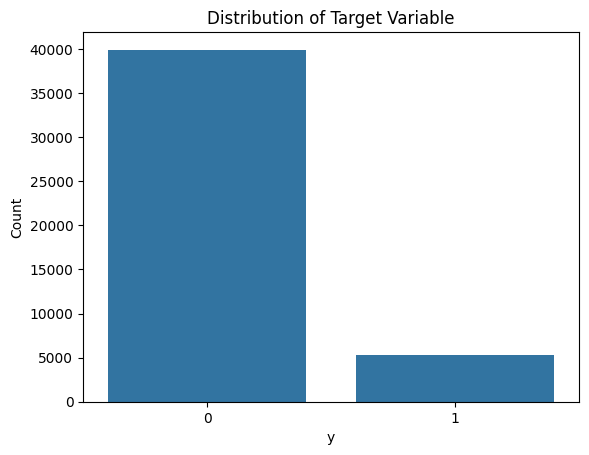

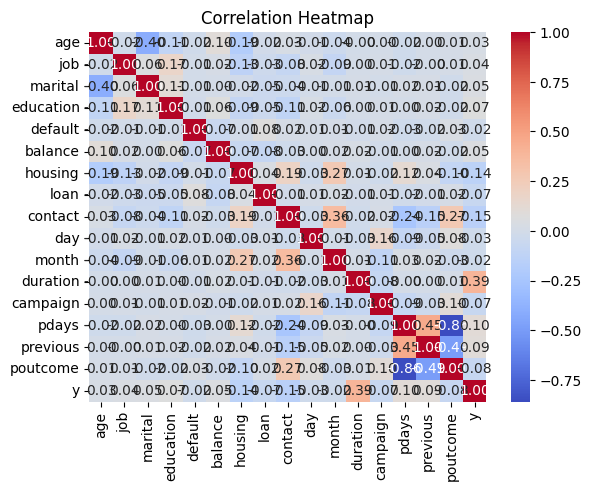

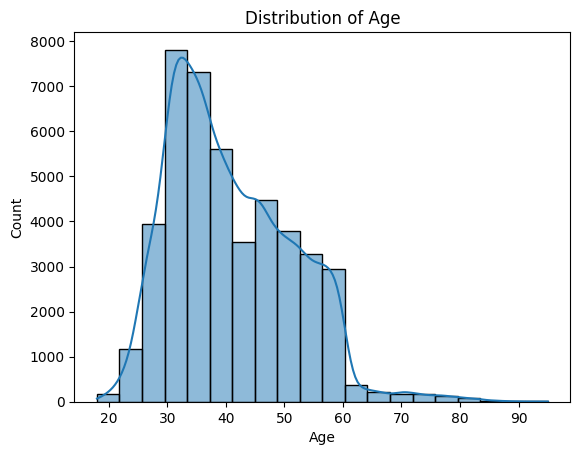

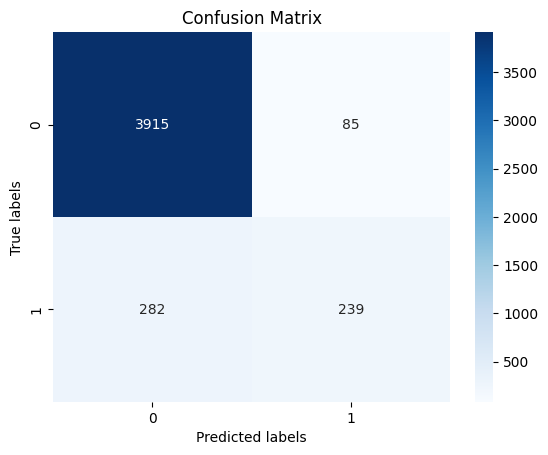

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Display distribution of the target variable 'y' in the training data
sns.countplot(data=train_data, x='y')
plt.title('Distribution of Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()
# Inference: This plot shows the distribution of the target variable 'y' in the training data.
# It helps in understanding the balance of classes in the dataset.

# Visualize correlations between features using a heatmap
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# Inference: This heatmap shows the correlation between different features in the training dataset.
# It helps in identifying potential multicollinearity issues and understanding feature relationships.

# Visualize the distribution of a numerical feature (e.g., age)
sns.histplot(data=train_data, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Inference: This histogram illustrates the distribution of the 'age' feature in the training dataset.
# It helps in understanding the age distribution of the dataset.

# Visualize the performance of the model
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
# Inference: This heatmap shows the confusion matrix, which helps in evaluating the performance of the model.
# It visualizes true positive, true negative, false positive, and false negative predictions.